In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [6]:
train_df=pd.read_csv('C:/Users/Varad/Documents/CropRecommendation/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('C:/Users/Varad/Documents/CropRecommendation/house-prices-advanced-regression-techniques/test.csv')

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [10]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train_df.shape

(1460, 81)

In [13]:
test_df.shape

(1459, 80)

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
test_df=test_df.drop(columns=['Alley','MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'])

In [16]:
new_df=train_df.drop(columns=['Alley','MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'])

In [17]:
new_df.shape


(1460, 75)

In [18]:
test_df.shape

(1459, 74)

In [19]:
new_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [20]:
num_cols=new_df.drop(columns=['SalePrice']).select_dtypes(include=['int64', 'float64','int32']).columns
imputer=KNNImputer()
imputer.fit(new_df[num_cols])
new_df[num_cols]=imputer.transform(new_df[num_cols])
test_df[num_cols]=imputer.transform(test_df[num_cols])

In [21]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000


In [22]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal


In [23]:
for cols in new_df.drop(columns=['SalePrice']).columns:
    mode=new_df[cols].mode()[0]
    new_df[cols].fillna(mode, inplace=True)
    test_df[cols].fillna(mode, inplace=True)

C:\Users\Varad\AppData\Local\Temp\ipykernel_26928\296998108.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[cols].fillna(mode, inplace=True)
C:\Users\Varad\AppData\Local\Temp\ipykernel_26928\296998108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [24]:
new_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [25]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [26]:
new_df.shape

(1460, 75)

In [27]:
test_df.shape

(1459, 74)

<Axes: ylabel='SalePrice'>

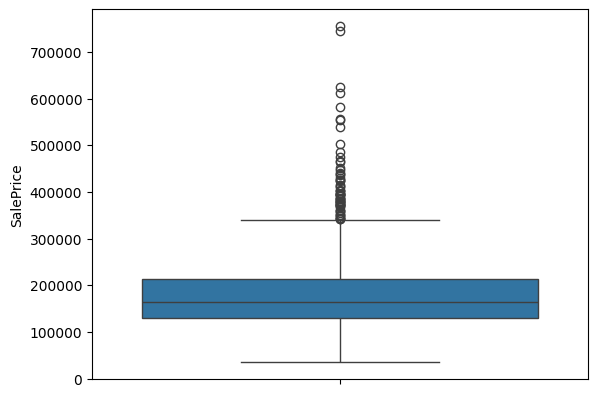

In [28]:
sns.boxplot(new_df['SalePrice'])

In [29]:
q1=new_df['SalePrice'].quantile(0.25)
q3=new_df['SalePrice'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
new_df=new_df[((new_df['SalePrice']>=lb) & (new_df['SalePrice']<=ub))]

<Axes: ylabel='SalePrice'>

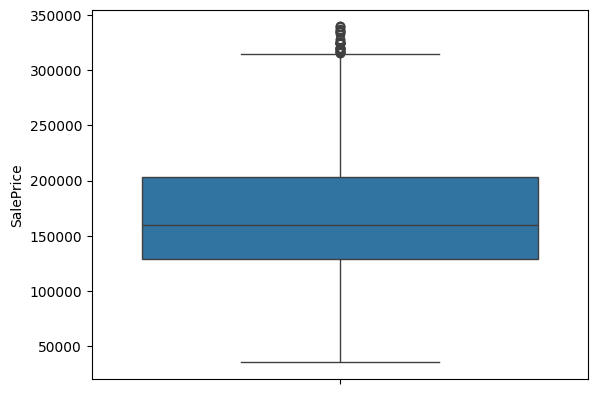

In [30]:
sns.boxplot(new_df['SalePrice'])


In [31]:
new_df.shape

(1399, 75)

In [32]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000


In [33]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal


In [34]:
cat_columns=new_df.select_dtypes(include=['object']).columns
num_columns=new_df.select_dtypes(include=['int64','float64']).columns
num_columns_test=new_df.select_dtypes(include=['int64','float64']).drop(columns=['SalePrice']).columns

In [36]:
ohe=OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoded_train=ohe.fit_transform(new_df[cat_columns])
encoded_test=ohe.transform(test_df[cat_columns])

In [37]:
encoded_train_df=pd.DataFrame(encoded_train,columns=ohe.get_feature_names_out(cat_columns), index=new_df.index)
encoded_test_df=pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(cat_columns), index=test_df.index)

In [38]:
num_train_df=new_df[num_columns]
num_test_df=test_df[num_columns_test]

In [39]:
new_df=pd.concat([num_train_df,encoded_train_df], axis=1)
test_df=pd.concat([num_test_df,encoded_test_df], axis=1)

In [40]:
new_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
new_df.shape

(1399, 231)

In [43]:
test_df.shape

(1459, 230)

In [44]:
new_df.corr()['SalePrice']

Id                      -0.011984
MSSubClass              -0.060111
LotFrontage              0.324211
LotArea                  0.249812
OverallQual              0.784294
OverallCond             -0.048005
YearBuilt                0.564558
YearRemodAdd             0.541161
MasVnrArea               0.353134
BsmtFinSF1               0.290377
BsmtFinSF2               0.007154
BsmtUnfSF                0.222795
TotalBsmtSF              0.543508
1stFlrSF                 0.522785
2ndFlrSF                 0.317358
LowQualFinSF            -0.058086
GrLivArea                0.661325
BsmtFullBath             0.202185
BsmtHalfBath            -0.018827
FullBath                 0.577369
HalfBath                 0.278831
BedroomAbvGr             0.201610
KitchenAbvGr            -0.147385
TotRmsAbvGrd             0.472292
Fireplaces               0.453010
GarageYrBlt              0.513061
GarageCars               0.628013
GarageArea               0.607230
WoodDeckSF               0.302339
OpenPorchSF   

In [45]:
test_df.shape

(1459, 230)

In [46]:
new_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
X_train,X_test,y_train,y_test=train_test_split(new_df.drop(columns=['SalePrice']),new_df['SalePrice'], test_size=0.2, random_state=2)

In [48]:
type(X_train)

pandas.core.frame.DataFrame

In [49]:
st=StandardScaler()
X_train_scaled=st.fit_transform(X_train)
X_test_scaled=st.transform(X_test)
test_df_scaled=st.transform(test_df)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)  # keep 90% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
test_df_pca=pca.transform(test_df_scaled)

In [51]:
model3=LinearRegression()
model3.fit(X_train_pca, y_train)

LinearRegression()

In [52]:
y_pred3=model3.predict(X_test_pca)

In [53]:
train_pred1=model3.predict(X_train_pca)

In [54]:
r2_score(y_train,train_pred1)

0.8790757793770442

In [55]:
np.sqrt(mean_squared_error(np.log1p(y_train),np.log1p(train_pred1)))

np.float64(0.12819479416069196)

In [56]:
r2_score(y_test,y_pred3)

0.8312822002432319

In [57]:
np.sqrt(mean_squared_error(np.log1p(y_test),np.log1p(y_pred3)))

np.float64(0.15165913900913877)

In [58]:
test_df['Id']=test_df['Id'].astype(float).astype(int)

In [59]:
final_pred=model3.predict(test_df_pca)

In [60]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [61]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': final_pred
})


In [62]:
submission.to_csv('submission.csv', index=False)

In [63]:
submission.head()

,Id,SalePrice
0,1461,118224.164191
1,1462,154887.454609
2,1463,173781.505363
3,1464,192229.241319
4,1465,182112.075829
